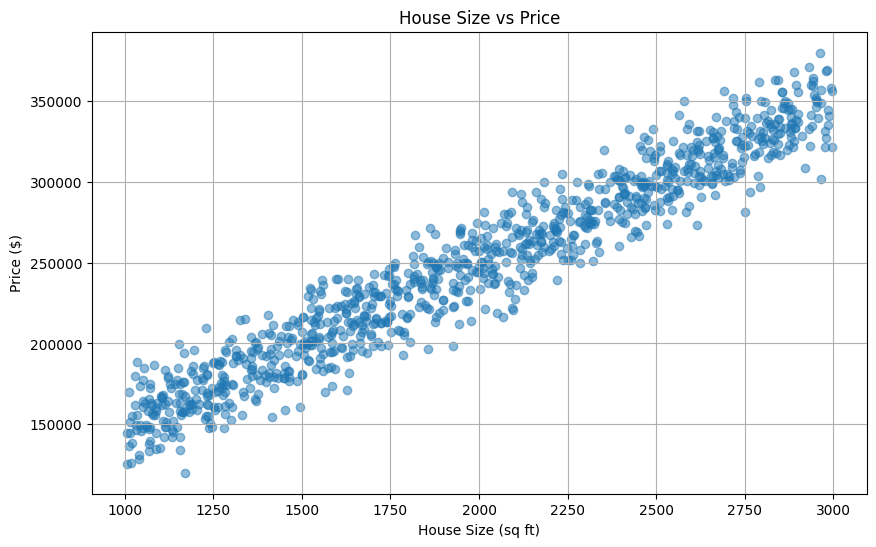

Iteration 0: Cost = 1826984622.0389879, m = 104.91174958389026, b = 0.04958912794315473

Final parameters: m = 123.1038045245647, b = 0.06475383611678519
This means: Price = 123.1038045245647 * Size + 0.06475383611678519


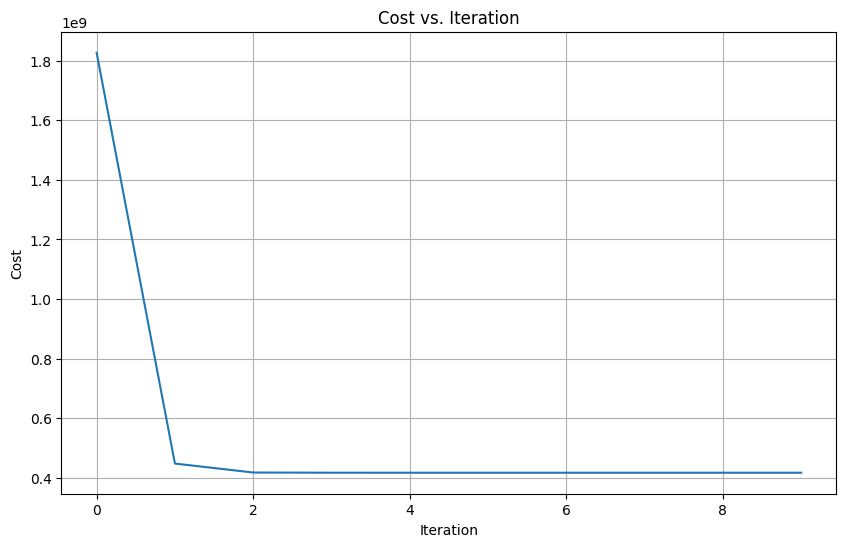

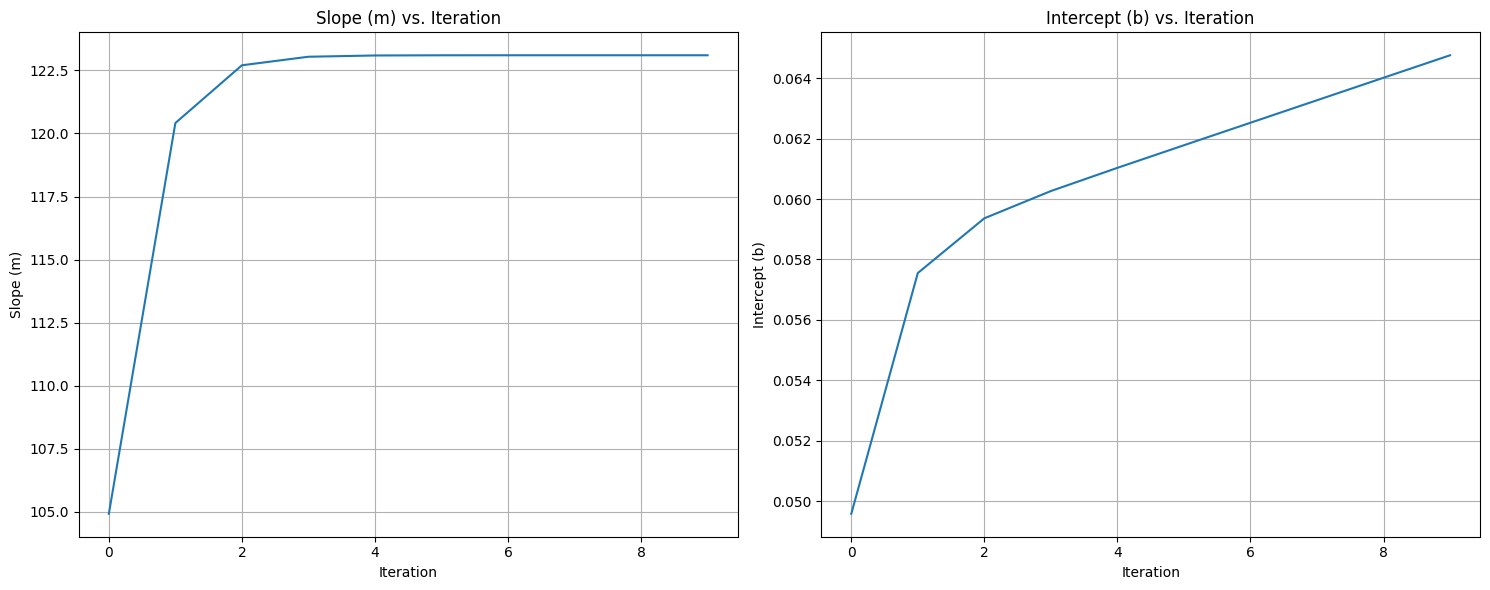

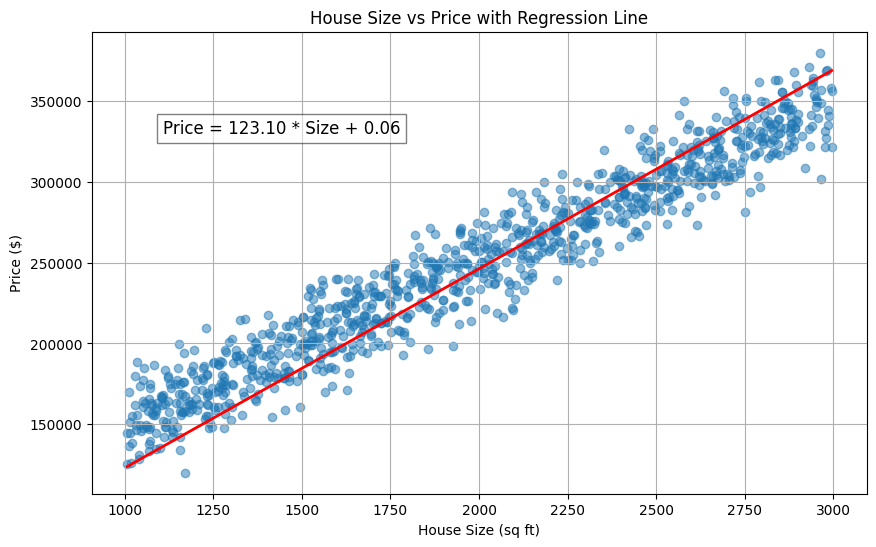


Sample Predictions:
A house with 1200 sq ft might cost $147724.63
A house with 1500 sq ft might cost $184655.77
A house with 2000 sq ft might cost $246207.67
A house with 2500 sq ft might cost $307759.58


In [ ]:
import random
import matplotlib.pyplot as plt

# Step 1: Create a dataset - house size (sq ft) vs. price ($)
def create_dataset(n_samples=1000):
    # We'll create a dataset with a clear linear trend plus some randomness
    # House sizes between 1000 and 3000 sq ft
    X = [random.uniform(1000, 3000) for _ in range(n_samples)]
    
    # True relationship: price = 100 * size + 50000 + noise
    # This means houses cost roughly $100 per sq ft plus a base price of $50,000
    y = [100 * x + 50000 + random.normalvariate(0, 15000) for x in X]
    
    return X, y

# Generate dataset
X, y = create_dataset(1000)

# Step 2: Plot the dataset to visualize the relationship
def plot_dataset(X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5)
    plt.title('House Size vs Price')
    plt.xlabel('House Size (sq ft)')
    plt.ylabel('Price ($)')
    plt.grid(True)
    plt.show()

plot_dataset(X, y)

# Step 3: Implement Linear Regression with Gradient Descent

# 3.1 Define our prediction function (y = mx + b)
def predict(x, m, b):
    return m * x + b

# 3.2 Define the cost function (Mean Squared Error)
def compute_cost(X, y, m, b):
    n = len(X)
    total_error = 0
    for i in range(n):
        prediction = predict(X[i], m, b)
        error = prediction - y[i]
        total_error += error ** 2
    return total_error / n

# 3.3 Implement Gradient Descent
def gradient_descent(X, y, learning_rate=0.0000001, iterations=1000):
    n = len(X)
    
    # Initialize parameters (m=slope, b=intercept)
    m = 0
    b = 0
    
    # Track cost history for visualization
    cost_history = []
    
    # Track parameter history
    m_history = []
    b_history = []
    
    for iteration in range(iterations):
        # Initialize gradient variables
        dm = 0
        db = 0
        
        # Compute gradients
        for i in range(n):
            prediction = predict(X[i], m, b)
            error = prediction - y[i]
            
            # Partial derivatives
            dm += error * X[i]
            db += error
        
        # Average gradients
        dm = dm /n 
        db = db /n 
        
        # Update parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db
        
        # Track parameters and cost
        cost = compute_cost(X, y, m, b)
        cost_history.append(cost)
        m_history.append(m)
        b_history.append(b)
        
        # Print progress every 100 iterations
        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Cost = {cost}, m = {m}, b = {b}")
    
    return m, b, cost_history, m_history, b_history

# Step 4: Run gradient descent
learning_rate = 0.0000001  # Small learning rate because our X values are large
iterations = 10
m_final, b_final, cost_history, m_history, b_history = gradient_descent(X, y, learning_rate, iterations)

print(f"\nFinal parameters: m = {m_final}, b = {b_final}")
print(f"This means: Price = {m_final} * Size + {b_final}")

# Step 5: Visualize the results

# 5.1 Plot the cost history
def plot_cost_history(cost_history):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cost_history)), cost_history)
    plt.title('Cost vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

plot_cost_history(cost_history)

# 5.2 Plot the parameter history
def plot_parameter_history(m_history, b_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.plot(range(len(m_history)), m_history)
    ax1.set_title('Slope (m) vs. Iteration')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Slope (m)')
    ax1.grid(True)
    
    ax2.plot(range(len(b_history)), b_history)
    ax2.set_title('Intercept (b) vs. Iteration')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Intercept (b)')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_parameter_history(m_history, b_history)

# 5.3 Plot the original data with the regression line
def plot_regression_line(X, y, m, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5)
    
    # Create regression line points
    min_x = min(X)
    max_x = max(X)
    line_x = [min_x, max_x]
    line_y = [predict(min_x, m, b), predict(max_x, m, b)]
    
    plt.plot(line_x, line_y, color='red', linewidth=2)
    plt.title('House Size vs Price with Regression Line')
    plt.xlabel('House Size (sq ft)')
    plt.ylabel('Price ($)')
    plt.grid(True)
    
    plt.text(min_x + 100, max(y) - 50000, 
             f'Price = {m_final:.2f} * Size + {b_final:.2f}', 
             fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    
    plt.show()

plot_regression_line(X, y, m_final, b_final)

# Step 6: Make predictions
def make_predictions(sizes, m, b):
    return [predict(size, m, b) for size in sizes]

# Predict prices for some sample house sizes
sample_sizes = [1200, 1500, 2000, 2500]
predicted_prices = make_predictions(sample_sizes, m_final, b_final)

print("\nSample Predictions:")
for size, price in zip(sample_sizes, predicted_prices):
    print(f"A house with {size} sq ft might cost ${price:.2f}")